In [1]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
X_train, X_test = x_train/255, x_test/255

X_train = X_train.reshape((60000,28,28,1))
X_test = X_test.reshape((10000,28,28,1))

In [2]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, kernel_size=(5, 5), strides=(1, 1), padding='same', activation='relu', input_shape=(28,28,1)),
    layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2)),
    layers.Conv2D(64, (2,2), activation='relu', padding='same'),
    layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax')

])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        8256      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 7, 7, 64)          0         
                                                                 
 flatten (Flatten)           (None, 3136)              0

In [3]:
%%time

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Wall time: 10 ms


In [4]:
%%time
hist = model.fit(X_train, y_train, epochs=5, verbose=1, validation_data=(X_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 41s 21ms/step - loss: 0.1136 - accuracy: 0.9640 - val_loss: 0.0391 - val_accuracy: 0.9873
Epoch 2/5
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0463 - accuracy: 0.9854 - val_loss: 0.0289 - val_accuracy: 0.9899
Epoch 3/5
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0343 - accuracy: 0.9894 - val_loss: 0.0326 - val_accuracy: 0.9890
Epoch 4/5
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0258 - accuracy: 0.9921 - val_loss: 0.0292 - val_accuracy: 0.9916
Epoch 5/5
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0205 - accuracy: 0.9933 - val_loss: 0.0295 - val_accuracy: 0.9920
Wall time: 3min 27s


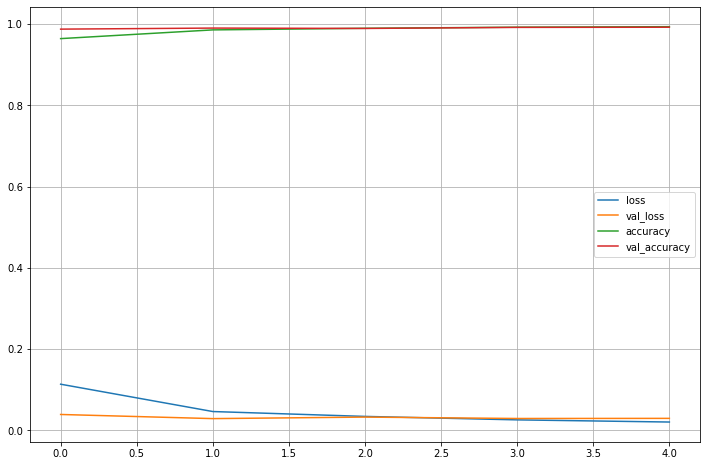

In [5]:
import matplotlib.pyplot as plt

plot_target = ['loss', 'val_loss', 'accuracy', 'val_accuracy']

plt.figure(figsize=(12, 8))

for each in plot_target:
    plt.plot(hist.history[each], label=each)

plt.legend()
plt.grid()

In [6]:
import numpy as np

predicted_result = model.predict(X_test)
predicted_labels = np.argmax(predicted_result, axis=1)
predicted_labels[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)

In [7]:
wrong_result = []

for n in range(len(y_test)):
    if predicted_labels[n] != y_test[n]:
        wrong_result.append(n)

len(wrong_result)

80

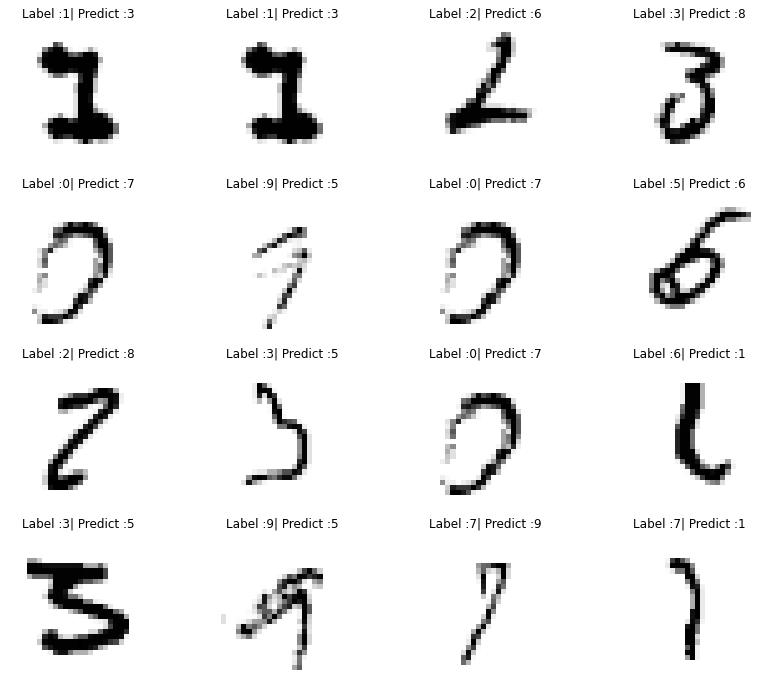

In [8]:
import random

samples = random.choices(population=wrong_result, k=16)

plt.figure(figsize=(14,12))

for idx, n in enumerate(samples):
    plt.subplot(4, 4, idx+1)
    plt.imshow(x_test[n].reshape(28, 28), cmap='Greys')
    plt.title('Label :'+str(y_test[n]) + '| Predict :'+str(predicted_labels[n]))
    plt.axis('off')

In [9]:
score = model.evaluate(X_test, y_test)
print(f'Test loss : {score[0]}')
print(f'Test accuracy: {score[1]}')

313/313 [==============================] - 1s 5ms/step - loss: 0.0295 - accuracy: 0.9920
Test loss : 0.029492639005184174
Test accuracy: 0.9919999837875366
